# VarCoef

By Cascade Tuholske, Sep 2020 <br>
Notebook to generate coeffiecent of variation of popgrid data. <br>

**Always check file order to drop gpwv4**

In [1]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio 
import xarray as xr
import geopandas as gpd
import glob
import rioxarray as rio
from scipy.stats import variation 
import rasterio.mask
import matplotlib.pyplot as plt

In [2]:
#### File Paths & FNs
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
country = ''

## Coef Var

In [3]:
def open_rst(rst_fn):
    "function opens a raster and makes it into a xarray object"
    
    rst = xr.DataArray(rasterio.open(rst_fn).read(1), dims = ['y', 'x']) # y and x are our 2-d labels
    
    return rst

In [4]:
def rst_coefvar(rst_fns, fn_out):
    """ Calc coef of var on stacked arrays and writes it out as a raster, returns the arr
    fst_fns = list of rasters 
    fn_out = file name and path to write out coef var raster
    """
    
    arr_list = [] # empty list
    
    # open and stack arrays
    for rst_fn in rst_fns:
        
      
        rst_arr = rasterio.open(rst_fn).read(1)
        arr_list.append(rst_arr)
    
    arr3d = np.dstack([arr_list])
        
    # mask zeros
    arr3d[arr3d == -999] = 'nan'
        
    # calculate variance across rasters & get data
    var = variation(arr3d, axis=0, nan_policy = 'propagate')
    arr_out = var.data
    
    # get meta data & write raster 
    out_meta = rasterio.open(rst_fns[0]).meta
    out_meta.update({'dtype' : 'float64'})
    
    with rasterio.open(fn_out, "w", **out_meta) as dest:
        dest.write(arr_out, 1)
        
    return var

In [5]:
# File paths
PATH = '/Users/cascade/Github/PopGridCompare/data/interim/'

In [6]:
# coefvar all tif files
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_Nepal.tif')
for rst in rst_fns: print(rst) # check them
del rst_fns[1] # drop GPv4
print('\n')
for rst in rst_fns: print(rst) # check them

# Variance Rst
fn_out = DATA_PATH+'interim/Nepal_all_coefvar.tif'
varall = rst_coefvar(rst_fns, fn_out)

/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_Nepal.tif


/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_Nepal.tif


In [7]:
# coefvar urban tif files
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*urban_Nepal.tif')
for rst in rst_fns: print(rst) # check them
del rst_fns[1] # drop GPv4
print('\n')
for rst in rst_fns: print(rst) # check them

# Variance Rst
fn_out = DATA_PATH+'interim/Nepal_urban_coefvar.tif'
varurban = rst_coefvar(rst_fns, fn_out)


/Users/cascade/Github/PopGridCompare/data/interim/GHS15_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/LS15_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_urban_Nepal.tif


/Users/cascade/Github/PopGridCompare/data/interim/GHS15_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_urban_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_urban_Nepal.tif


/Users/cascade/opt/miniconda3/envs/geo38/lib/python3.8/site-packages/scipy/stats/stats.py:1144: RuntimeWarning: invalid value encountered in true_divide
  return a.std(axis) / a.mean(axis)


In [8]:
# coefvar rural tif files
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*rural_Nepal.tif')
for rst in rst_fns: print(rst) # check them
del rst_fns[1] # drop GPv4
print('\n')
for rst in rst_fns: print(rst) # check them

# Variance Rst
fn_out = DATA_PATH+'interim/Nepal_rural_coefvar.tif'
varrural = rst_coefvar(rst_fns, fn_out)

/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/LS15_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GHS15_rural_Nepal.tif


/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/LS15_rural_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GHS15_rural_Nepal.tif


## Pixel Aggreement

In [9]:
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_Nepal.tif')
for rst in rst_fns: print(rst) # check them
del rst_fns[3] # drop GPv4
rst_fns

/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_all_Nepal.tif
/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_Nepal.tif


['/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_Nepal.tif']

In [10]:
# Get all arrays
arrs = []

for rst in rst_fns:
    arr = rasterio.open(rst).read(1)
    arrs.append(arr)

In [11]:
# find areas of agreement
zeros = []
for arr in arrs:
    zero = arr > -999
    zero = zero.astype(int)
    zeros.append(zero)

agg = sum(zeros)

In [12]:
agg32 = agg.astype('int32')

In [13]:
# get meta data & write raster 
out_meta = rasterio.open(rst_fns[0]).meta

In [14]:
fn_out = DATA_PATH+'interim/all_Nepal_agg.tif'
with rasterio.open(fn_out, "w", **out_meta) as dest:
    dest.write(agg32, 1)

## Distribution of Pixels

In [84]:
# What are the maxium values:
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_Nepal.tif')

for rst in rst_fns:
    data = (rasterio.open(rst).read(1)).flatten().max()
    print('Max value for', rst.split('interim/')[1], data)


Max value for LS15_all_Nepal.tif 57668
Max value for GPWv4_all_Nepal.tif 32592.428
Max value for WP16_all_Nepal.tif 48357.727
Max value for ESRI16_all_Nepal.tif 45982
Max value for GHS15_all_Nepal.tif 117461.80763053894


In [85]:
# What are the maxium values:
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*rural_Nepal.tif')

for rst in rst_fns:
    data = (rasterio.open(rst).read(1)).flatten().max()
    print('Max value for', rst.split('interim/')[1], data)

Max value for ESRI16_rural_Nepal.tif 25237
Max value for GPWv4_rural_Nepal.tif 28114.049
Max value for WP16_rural_Nepal.tif 46939.12
Max value for LS15_rural_Nepal.tif 44892
Max value for GHS15_rural_Nepal.tif 117461.80763053894


In [86]:
# What are the maxium values:
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*urban_Nepal.tif')

for rst in rst_fns:
    data = (rasterio.open(rst).read(1)).flatten().max()
    print('Max value for', rst.split('interim/')[1], data)

Max value for GHS15_urban_Nepal.tif 46471.50518798828
Max value for LS15_urban_Nepal.tif 57668
Max value for WP16_urban_Nepal.tif 48357.727
Max value for GPWv4_urban_Nepal.tif 32592.428
Max value for ESRI16_urban_Nepal.tif 45982


In [24]:
fn_in = DATA_PATH+'interim/Nepal_all_coefvar.tif'
arr = rasterio.open(fn_in).read(1)

In [25]:
flat = arr.flatten() 

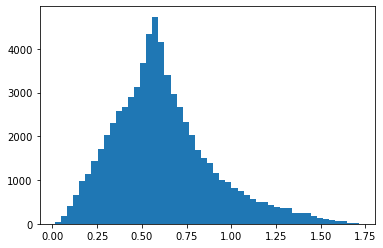

In [26]:
plt.hist(flat, bins = 50);

In [55]:
def flat(rst_fn):
    "helper to flatten 2d array for histogramss"
    arr = rasterio.open(rst_fn).read(1)
    flat = arr.flatten()
    
    # revalue na -999
    flat = np.where(flat==-999, 0, flat) 
    
    return flat

In [72]:
#  all tif files
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_Nepal.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_Nepal.tif']

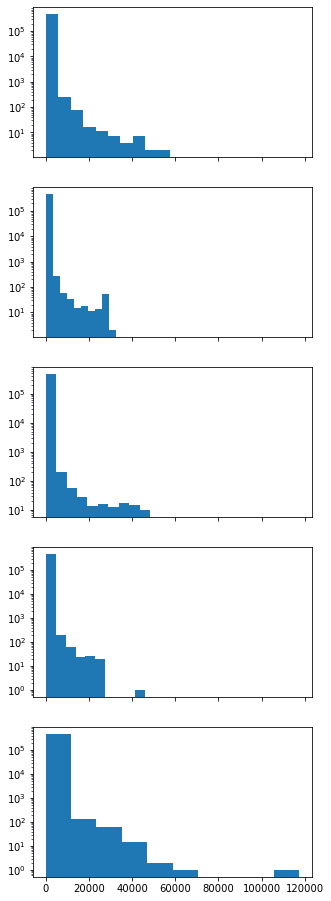

In [75]:
#### Make Figure & Save it
# coefvar all tif files
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_Nepal.tif')
rst_fns

#rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 

fig, axs = plt.subplots(5, 1, figsize = (5, 16), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

for i, rst_fn in enumerate(rst_fns):
    data = flat(rst_fns[i])
    axs[i].hist(data, log = True);

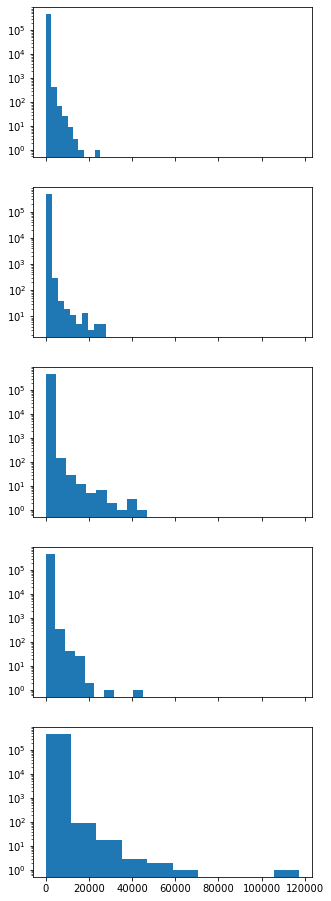

In [76]:
#### Make Figure & Save it
# coefvar all tif files
rst_fns = glob.glob('/Users/cascade/Github/PopGridCompare/data/interim/*rural_Nepal.tif')
rst_fns

#rcParams['mathtext.default'] = 'regular' # set text to reg, not italic 

fig, axs = plt.subplots(5, 1, figsize = (5, 16), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

for i, rst_fn in enumerate(rst_fns):
    data = flat(rst_fns[i])
    axs[i].hist(data, log = True);

In [77]:
data = flat(rst_fns[4])

In [78]:
max(data)

117461.80763053894